In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python import keras
from tensorflow.python.keras import utils
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import imageio
from PIL import Image

In [2]:
!unzip agedetectiontrain.zip
!unzip agedetectiontest.zip

unzip:  cannot find or open agedetectiontrain.zip, agedetectiontrain.zip.zip or agedetectiontrain.zip.ZIP.
unzip:  cannot find or open agedetectiontest.zip, agedetectiontest.zip.zip or agedetectiontest.zip.ZIP.


In [3]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128

In [4]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1538003 (5.87 MB)
Trainable params: 1538003 (5.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

NameError: ignored

In [8]:
pred = np.argmax(model.predict(test_x),axis=1)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('out.csv', index=False)

NameError: ignored

  1/208 [..............................] - ETA: 4s

<ipython-input-17-31c251792621>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/content/Test', img_name))


208/208 [==============================] - 1s 5ms/step
Original: MIDDLE Predicted: ['YOUNG']


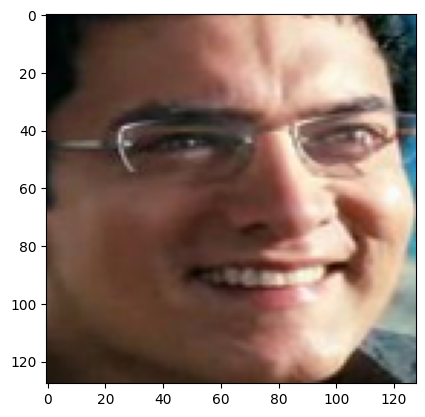

In [ ]:
idx = 2481
img_name = test.ID[idx]
img = imageio.imread(os.path.join('/content/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = np.argmax(model.predict(test_x),axis=1)
#pred = model.predict_classes(test_x)
print('Original:', train.Class[idx], 'Predicted:', lb.inverse_transform([pred[idx]]))